# Linear Reservoir Model

Conceptually the linear reservoir model employs the water budget for a watershed, and that discharge from the watershed is proportional to the current accumulated storage.  

Starting with something like the sketch below.

![](linearReservoir.png)

One relates the discharge formula and the storage formula.  The discharge formula, is where the "linear" part arises (linear in accumulated watershed depth) the constant $\frac{1}{\alpha}$ is just some property of the watershed; $\alpha$ is non zero.

$$Q(t) = \frac{1}{\alpha}~A~\bar h(t)$$

And the storage formula is

$$P(t)~A - Q(t) = \frac{dS}{dt}$$

with a substitution

$$P(t)~A - C~A~\bar h(t) = \frac{dS}{dt}$$

Storage itself is simply the product of the accumulated watershed depth and area

$$S = A~\bar h(t)$$

Another substitution

$$P(t)~A - \frac{1}{\alpha}~A~\bar h(t) = \frac{dA~\bar h(t)}{dt}$$

Now we can factor out the obvious constants to obtain

$$A[P(t) - \frac{1}{\alpha}~\bar h(t)] = A~\frac{d~\bar h(t)}{dt}$$

Seperate, integrate, and simplify; we assume that $P$ is some constant (otherwise the analysis is a bit more complex)

$$Q = A~\frac{1}{\alpha}~\bar h(t) = A~P(1-e^{-\frac{t}{\alpha}})$$

Now naturally we dont know $\alpha$ for a watershed, hence the need for data analysis.  Suppose for the sake of demonstration it is 1.0, we can simulate the anticipated discharge for a watershed (in the absence of losses)



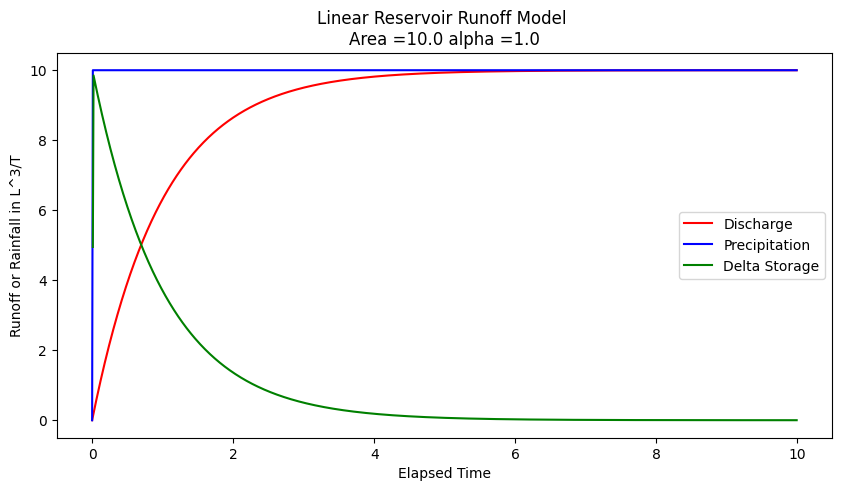

In [1]:
# structural simulation need units for practical applications
import math
alpha = 1.0 #watershed discharge conversion constant
area = 10.0 #some area
pee = 1.0 #constant rain
qzero = 0 #zero initial discharge
hzero = 0 #zero initial storage
howmany = 1000
qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
dsnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
dsnow[0]=math.inf # set first condition at infinty
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=(area*pee*(1.0-math.exp(-time[itime]/alpha)))
    pnow[itime]=(area*pee)
    average_in=0.5*(pnow[itime]+pnow[itime-1])
    average_out=0.5*(qnow[itime]+qnow[itime-1])
    dsnow[itime]=((average_in-average_out))

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(time, qnow, color ='red') 
matplotlib.pyplot.plot(time, pnow, color ='blue') 
matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Elapsed Time") 
matplotlib.pyplot.ylabel("Runoff or Rainfall in L^3/T") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Area ="+str(area)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["Discharge","Precipitation","Delta Storage"])
matplotlib.pyplot.show() 



A interpretation of this kind of model can serve as an explaination of the NRCS CN method (but in cumulative space)

## References

1. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Rational Equation, HEC-HMS)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture09.pdf)

1. [Subdivision of Texas Watersheds for Hydrologic Modeling](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/project_reports/0-5822-1/)

2. [Rate-Based Estimation of the Runoff Coefficients for Selected Watersheds in Texas](http://54.243.252.9/ce-3354-webroot/3-Readings/RateBasedC/Rate-Based-C-Texas.pdf)

3. Kuichling, E. (1889). “The relation between the rainfall and the discharge of sewers in populous areas.” Trans. ASCE, 20(1), 1–56.

4. Gupta pp. 711-724